# Ahmet Emre Usta - 2200765036

In [1]:
import os
import pandas as pd
from sklearn.preprocessing import (
    MinMaxScaler,
)

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display
import warnings

warnings.filterwarnings("ignore", message="is_categorical_dtype is deprecated")

In [2]:
working_dir = "/Users/emre/GitHub/HU-AI/AIN429/Assignment 1"
DATASET_PATH = os.path.join(working_dir, "dataset")
RAW_DATASET_PATH = os.path.join(DATASET_PATH, "raw")
PROCESSED_DATASET_PATH = os.path.join(DATASET_PATH, "processed")
DATASET_PATH = os.path.join(RAW_DATASET_PATH, "data.csv")

In [3]:
df = pd.read_csv(DATASET_PATH, delimiter=";")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


There are 9471 row in dataset and some of them are null

In [5]:
# drop Unnamed: 15 and Unnamed: 16 columns since there is nothing there
df = df.drop(["Unnamed: 15", "Unnamed: 16"], axis=1)

In [6]:
# check every col for missing values and print 5 sample of them
for col in df.columns:
    print(f"{col} has {df[col].isnull().sum()} missing values")
    display(df[df[col].isnull()].sample(3))

Date has 114 missing values


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Time has 114 missing values


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


CO(GT) has 114 missing values


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


PT08.S1(CO) has 114 missing values


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NMHC(GT) has 114 missing values


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C6H6(GT) has 114 missing values


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


PT08.S2(NMHC) has 114 missing values


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NOx(GT) has 114 missing values


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


PT08.S3(NOx) has 114 missing values


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NO2(GT) has 114 missing values


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


PT08.S4(NO2) has 114 missing values


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


PT08.S5(O3) has 114 missing values


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


T has 114 missing values


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


RH has 114 missing values


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


AH has 114 missing values


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# check if the null values are in the same rows and print the number of them
print(f"Complete null row count: {df[df.isnull().any(axis=1)].shape[0]}")
df[df.isnull().any(axis=1)]

Complete null row count: 114


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# drop every row that has missing values since every value is empty in them even date time too
df = df.dropna()

In [9]:
# convert date to dateobject
# concat the Date and Time cols
df["DateTime"] = pd.to_datetime(
    df["Date"] + " " + df["Time"], format="%d/%m/%Y %H.%M.%S"
)
df = df.drop(["Date", "Time"], axis=1)
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004-03-10 18:00:00
1,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004-03-10 19:00:00
2,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004-03-10 20:00:00
3,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004-03-10 21:00:00
4,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004-03-10 22:00:00


In [10]:
# correct the . and , in the dataset
df.loc[:, df.columns.difference(["DateTime"])] = (
    df.loc[:, df.columns.difference(["DateTime"])]
    .replace(",", ".", regex=True)
    .astype(float)
)

In [11]:
# convert all to float except DateTime
for col in df.columns:
    if col != "DateTime":
        df[col] = df[col].astype(float)

In [12]:
# show min and max values of every col
for col in df.columns:
    print(f"{col} min: {df[col].min()} max: {df[col].max()}")

CO(GT) min: -200.0 max: 11.9
PT08.S1(CO) min: -200.0 max: 2040.0
NMHC(GT) min: -200.0 max: 1189.0
C6H6(GT) min: -200.0 max: 63.7
PT08.S2(NMHC) min: -200.0 max: 2214.0
NOx(GT) min: -200.0 max: 1479.0
PT08.S3(NOx) min: -200.0 max: 2683.0
NO2(GT) min: -200.0 max: 340.0
PT08.S4(NO2) min: -200.0 max: 2775.0
PT08.S5(O3) min: -200.0 max: 2523.0
T min: -200.0 max: 44.6
RH min: -200.0 max: 88.7
AH min: -200.0 max: 2.231
DateTime min: 2004-03-10 18:00:00 max: 2005-04-04 14:00:00


In [13]:
# since -200 provided us as a missing value, we will check them
# show every row that has -200
print(f"Rows contains -200: {len(df[df.eq(-200).any(axis=1)])}")
df[df.eq(-200).any(axis=1)].sample(5)

Rows contains -200: 8530


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
4485,2.0,1154.0,-200.0,11.3,1026.0,505.0,773.0,208.0,1623.0,1212.0,32.6,31.8,1.5361,2004-09-13 15:00:00
5573,1.2,950.0,-200.0,5.4,782.0,127.0,862.0,69.0,1331.0,807.0,20.1,62.6,1.4543,2004-10-28 23:00:00
2946,0.5,827.0,-200.0,3.8,697.0,32.0,1070.0,46.0,1371.0,478.0,29.5,25.9,1.0489,2004-07-11 12:00:00
2672,0.8,961.0,-200.0,5.8,801.0,33.0,850.0,44.0,1683.0,798.0,26.0,54.9,1.8141,2004-06-30 02:00:00
5294,-200.0,875.0,-200.0,4.8,754.0,-200.0,961.0,-200.0,1296.0,591.0,15.9,61.0,1.0911,2004-10-17 08:00:00


In [14]:
# Convert the data to a numeric format (e.g., NaN for missing values)
df = df.replace(-200, float("nan"))

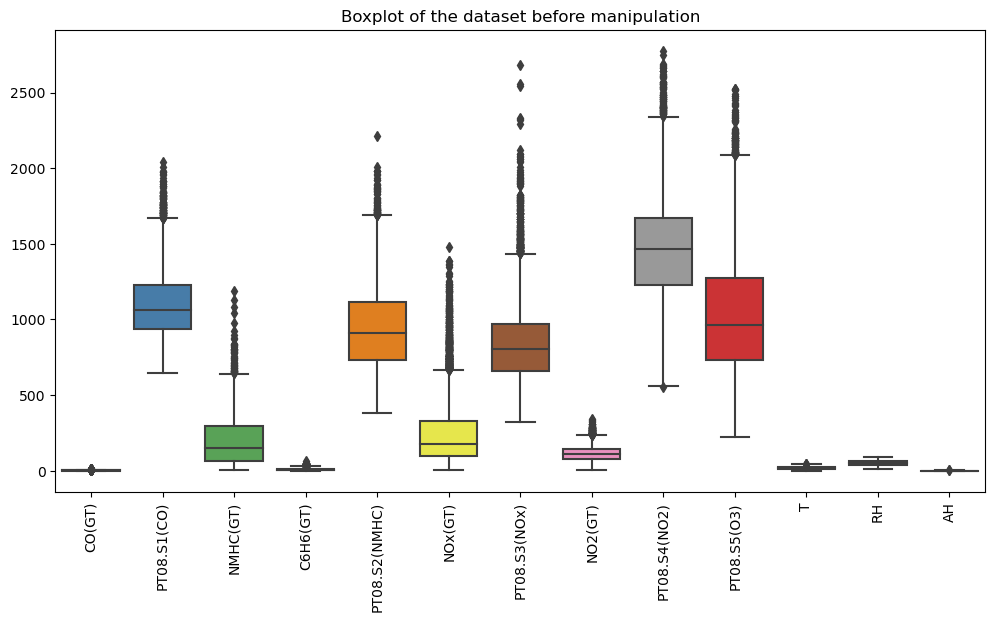

In [15]:
plt.figure(figsize=(12, 6))
plt.title("Boxplot of the dataset before manipulation")
sns.boxplot(data=df, palette="Set1")
plt.xticks(rotation=90)
plt.show()

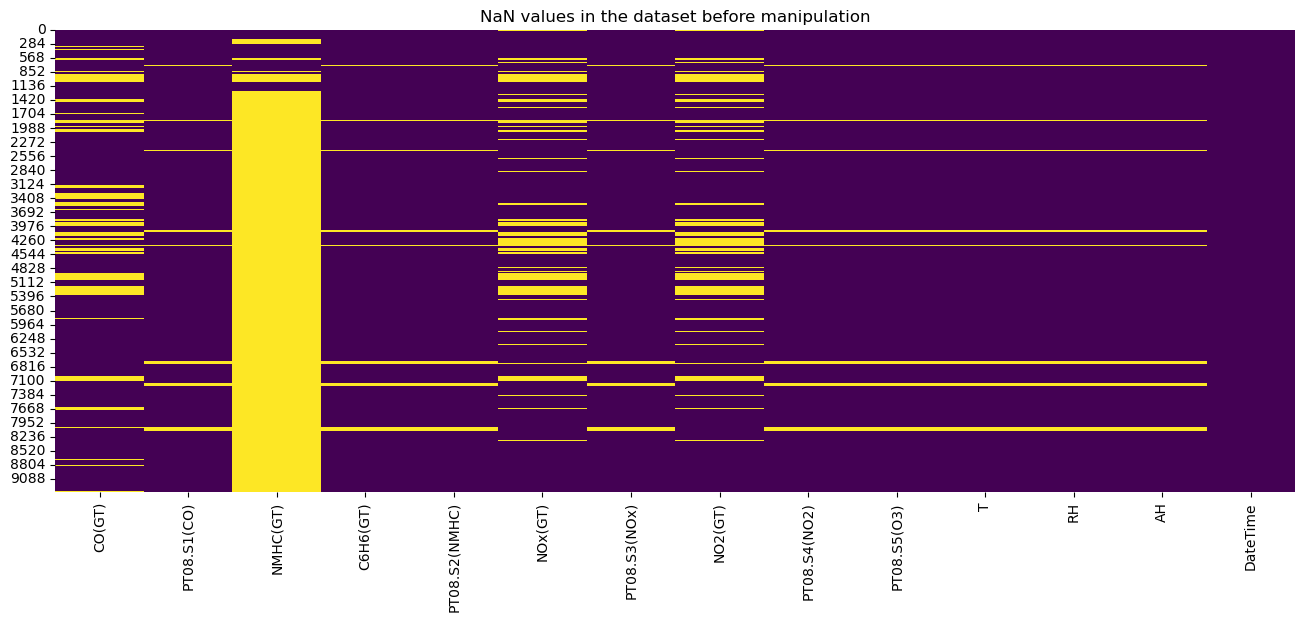

In [16]:
plt.figure(figsize=(16, 6))
plt.title("NaN values in the dataset before manipulation")
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

In [17]:
for col in df.columns:
    if col != "DateTime":
        nan_count = df[col].isnull().sum()
        print(f"{col} has {nan_count} NaN values")
        display(df[df[col].isnull()].sample(3))
        print()

CO(GT) has 1683 NaN values


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
3411,NaN,1149.0,NaN,13.2,1092.0,114.0,667.0,118.0,1808.0,1135.0,29.1,38.9,1.5384,2004-07-30 21:00:00
1887,NaN,1245.0,NaN,19.4,1281.0,NaN,774.0,NaN,1952.0,1324.0,20.8,43.6,1.0614,2004-05-28 09:00:00
1410,NaN,1213.0,NaN,11.1,1018.0,NaN,760.0,NaN,1778.0,1061.0,13.3,76.8,1.1703,2004-05-08 12:00:00



PT08.S1(CO) has 366 NaN values


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
6738,4.2,NaN,NaN,NaN,NaN,845.0,NaN,190.0,NaN,NaN,NaN,NaN,NaN,2004-12-16 12:00:00
6939,5.6,NaN,NaN,NaN,NaN,521.0,NaN,157.0,NaN,NaN,NaN,NaN,NaN,2004-12-24 21:00:00
2450,1.6,NaN,NaN,NaN,NaN,75.0,NaN,87.0,NaN,NaN,NaN,NaN,NaN,2004-06-20 20:00:00



NMHC(GT) has 8443 NaN values


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
8403,2.9,1209.0,NaN,11.4,1028.0,425.0,619.0,243.0,1264.0,1254.0,4.2,79.7,0.6647,2005-02-23 21:00:00
8233,3.4,1288.0,NaN,15.9,1178.0,433.0,539.0,171.0,1300.0,1434.0,7.0,43.4,0.4366,2005-02-16 19:00:00
7846,3.2,1162.0,NaN,15.7,1170.0,503.0,618.0,204.0,1131.0,1425.0,14.1,18.2,0.2908,2005-01-31 16:00:00



C6H6(GT) has 366 NaN values


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
6722,2.4,NaN,NaN,NaN,NaN,325.0,NaN,115.0,NaN,NaN,NaN,NaN,NaN,2004-12-15 20:00:00
2429,2.4,NaN,NaN,NaN,NaN,125.0,NaN,113.0,NaN,NaN,NaN,NaN,NaN,2004-06-19 23:00:00
8080,4.3,NaN,NaN,NaN,NaN,604.0,NaN,250.0,NaN,NaN,NaN,NaN,NaN,2005-02-10 10:00:00



PT08.S2(NMHC) has 366 NaN values


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
7164,1.4,NaN,NaN,NaN,NaN,264.0,NaN,102.0,NaN,NaN,NaN,NaN,NaN,2005-01-03 06:00:00
8068,2.2,NaN,NaN,NaN,NaN,228.0,NaN,157.0,NaN,NaN,NaN,NaN,NaN,2005-02-09 22:00:00
6708,1.0,NaN,NaN,NaN,NaN,244.0,NaN,82.0,NaN,NaN,NaN,NaN,NaN,2004-12-15 06:00:00



NOx(GT) has 1639 NaN values


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
1864,NaN,1074.0,NaN,9.0,939.0,NaN,1071.0,NaN,1513.0,997.0,25.6,28.0,0.9088,2004-05-27 10:00:00
4304,0.6,854.0,NaN,1.7,562.0,NaN,1106.0,NaN,1224.0,400.0,24.3,42.9,1.2906,2004-09-06 02:00:00
849,NaN,889.0,NaN,1.7,559.0,NaN,1331.0,NaN,1241.0,714.0,10.2,63.2,0.7865,2004-04-15 03:00:00



PT08.S3(NOx) has 366 NaN values


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
4916,3.2,NaN,NaN,NaN,NaN,383.0,NaN,123.0,NaN,NaN,NaN,NaN,NaN,2004-10-01 14:00:00
4076,1.4,NaN,NaN,NaN,NaN,82.0,NaN,88.0,NaN,NaN,NaN,NaN,NaN,2004-08-27 14:00:00
8044,1.1,NaN,NaN,NaN,NaN,157.0,NaN,127.0,NaN,NaN,NaN,NaN,NaN,2005-02-08 22:00:00



NO2(GT) has 1642 NaN values


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
5284,NaN,942.0,NaN,4.0,712.0,NaN,979.0,NaN,1303.0,734.0,17.2,66.7,1.2987,2004-10-16 22:00:00
4473,NaN,870.0,NaN,3.7,692.0,NaN,1070.0,NaN,1443.0,779.0,20.4,70.7,1.6734,2004-09-13 03:00:00
57,1.7,1172.0,46.0,5.4,783.0,NaN,1179.0,NaN,1380.0,996.0,7.8,67.5,0.7173,2004-03-13 03:00:00



PT08.S4(NO2) has 366 NaN values


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
7197,3.0,NaN,NaN,NaN,NaN,473.0,NaN,172.0,NaN,NaN,NaN,NaN,NaN,2005-01-04 15:00:00
2441,1.0,NaN,NaN,NaN,NaN,42.0,NaN,59.0,NaN,NaN,NaN,NaN,NaN,2004-06-20 11:00:00
2453,4.2,NaN,NaN,NaN,NaN,136.0,NaN,108.0,NaN,NaN,NaN,NaN,NaN,2004-06-20 23:00:00



PT08.S5(O3) has 366 NaN values


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
7199,3.8,NaN,NaN,NaN,NaN,532.0,NaN,184.0,NaN,NaN,NaN,NaN,NaN,2005-01-04 17:00:00
8084,2.4,NaN,NaN,NaN,NaN,226.0,NaN,128.0,NaN,NaN,NaN,NaN,NaN,2005-02-10 14:00:00
7779,1.8,NaN,NaN,NaN,NaN,219.0,NaN,153.0,NaN,NaN,NaN,NaN,NaN,2005-01-28 21:00:00



T has 366 NaN values


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
1827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-05-25 21:00:00
6713,3.5,NaN,NaN,NaN,NaN,809.0,NaN,176.0,NaN,NaN,NaN,NaN,NaN,2004-12-15 11:00:00
6753,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-12-17 03:00:00



RH has 366 NaN values


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
7185,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-01-04 03:00:00
6760,5.0,NaN,NaN,NaN,NaN,937.0,NaN,164.0,NaN,NaN,NaN,NaN,NaN,2004-12-17 10:00:00
4087,0.7,NaN,NaN,NaN,NaN,41.0,NaN,58.0,NaN,NaN,NaN,NaN,NaN,2004-08-28 01:00:00



AH has 366 NaN values


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
4353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-09-08 03:00:00
702,2.4,NaN,189.0,NaN,NaN,154.0,NaN,109.0,NaN,NaN,NaN,NaN,NaN,2004-04-09 00:00:00
1838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-05-26 08:00:00


In [18]:
# show the row contains more than one NaN value
print(
    f"There are {len(df[df.isnull().sum(axis=1) > 1])} rows that contains more than one NaN value"
)
df[df.isnull().sum(axis=1) > 1]

There are 2392 rows that contains more than one NaN value


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
9,0.6,1010.0,19.0,1.7,561.0,NaN,1705.0,NaN,1235.0,501.0,10.3,60.2,0.7517,2004-03-11 03:00:00
33,0.8,889.0,21.0,1.9,574.0,NaN,1680.0,NaN,1187.0,512.0,7.0,62.3,0.6261,2004-03-12 03:00:00
39,NaN,1545.0,NaN,22.1,1353.0,NaN,767.0,NaN,2058.0,1588.0,9.2,56.2,0.6561,2004-03-12 09:00:00
57,1.7,1172.0,46.0,5.4,783.0,NaN,1179.0,NaN,1380.0,996.0,7.8,67.5,0.7173,2004-03-13 03:00:00
81,2.4,1344.0,132.0,9.7,968.0,NaN,921.0,NaN,1620.0,1278.0,11.6,63.4,0.8674,2004-03-14 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9058,NaN,993.0,NaN,2.3,604.0,85.0,848.0,65.0,1160.0,762.0,14.5,66.4,1.0919,2005-03-23 04:00:00
9130,NaN,1122.0,NaN,6.0,811.0,181.0,641.0,92.0,1336.0,1122.0,16.2,71.2,1.3013,2005-03-26 04:00:00
9202,NaN,883.0,NaN,1.3,530.0,63.0,997.0,46.0,1102.0,617.0,13.7,68.2,1.0611,2005-03-29 04:00:00
9274,NaN,818.0,NaN,0.8,473.0,47.0,1257.0,41.0,898.0,323.0,13.7,48.8,0.7606,2005-04-01 04:00:00


Since the values contains time information it's better to fill them to drop

In this step it might be better to use different fill technuqie like daily mean or weakly mean etc.
But since there is no expert information it's more usual to choose mean of whole dataset.

In [19]:
all_mean_df = df.copy()

for col in df.columns:
    if col != "DateTime":
        all_mean_df[col] = df[col].replace([-200, float("nan")], df[col].mean())

all_mean_df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


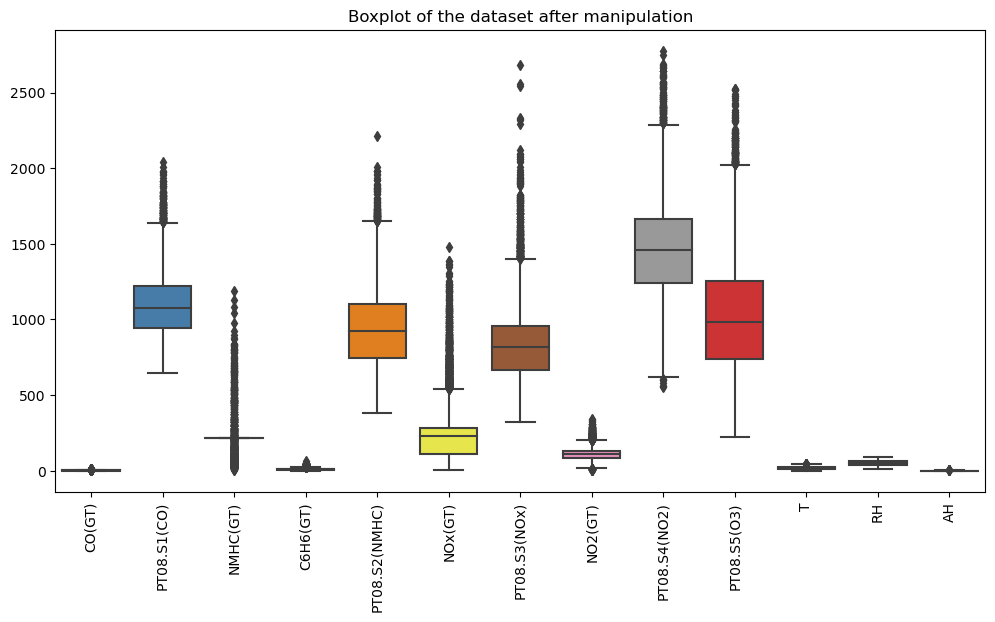

In [20]:
plt.figure(figsize=(12, 6))
plt.title("Boxplot of the dataset after manipulation")
sns.boxplot(data=all_mean_df, palette="Set1")
plt.xticks(rotation=90)
plt.show()

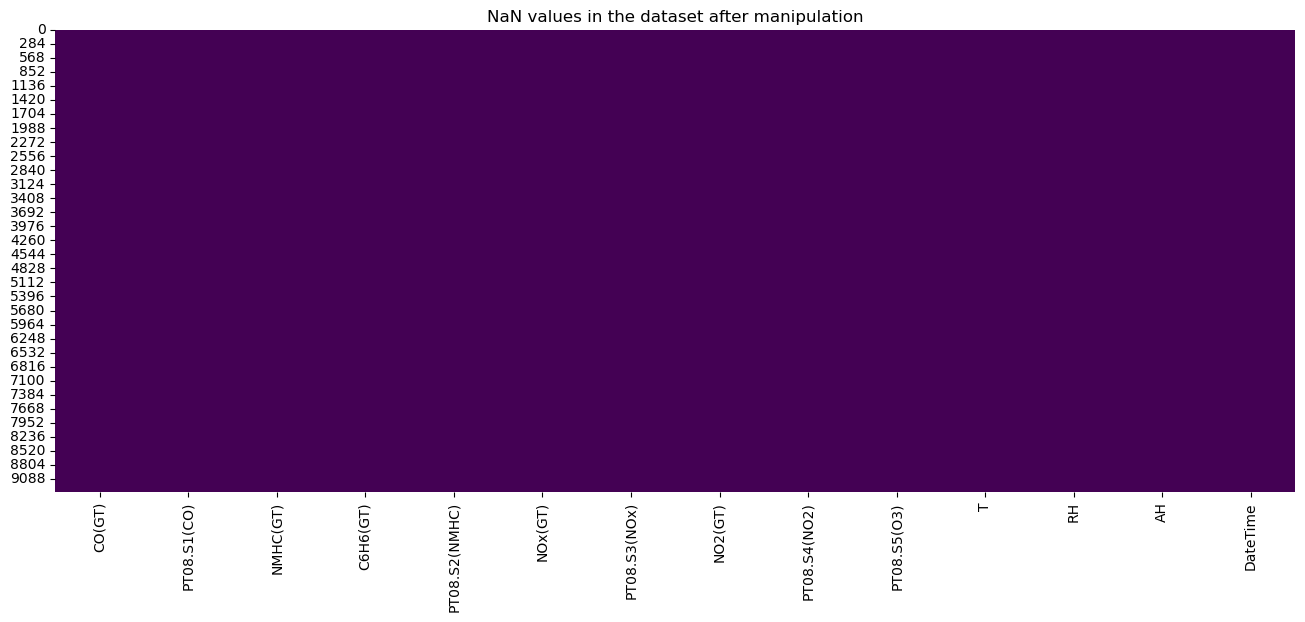

In [21]:
plt.figure(figsize=(16, 6))
plt.title("NaN values in the dataset after manipulation")
sns.heatmap(all_mean_df.isnull(), cbar=False, cmap="viridis")
plt.show()

In [22]:
# show line plot for given two col
def show_line_plot(df, col1, col2):
    plt.figure(figsize=(16, 6))
    plt.title(f"{col1} and {col2} line plot")
    plt.plot(df["DateTime"], df[col1], label=col1)
    plt.plot(df["DateTime"], df[col2], label=col2)
    plt.legend()
    plt.show()

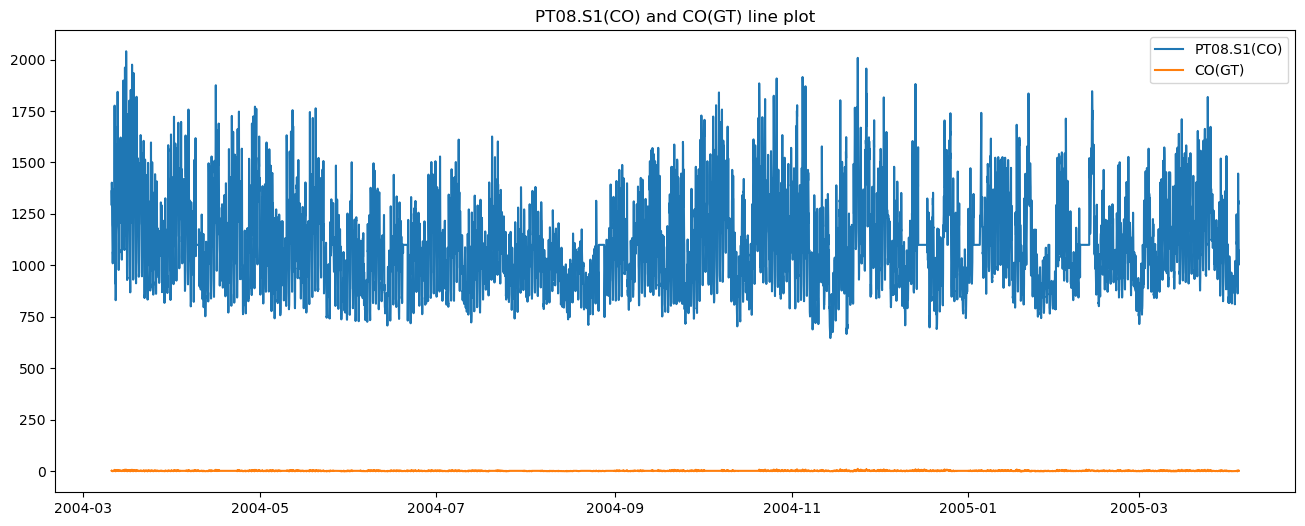

In [23]:
show_line_plot(all_mean_df, "PT08.S1(CO)", "CO(GT)")

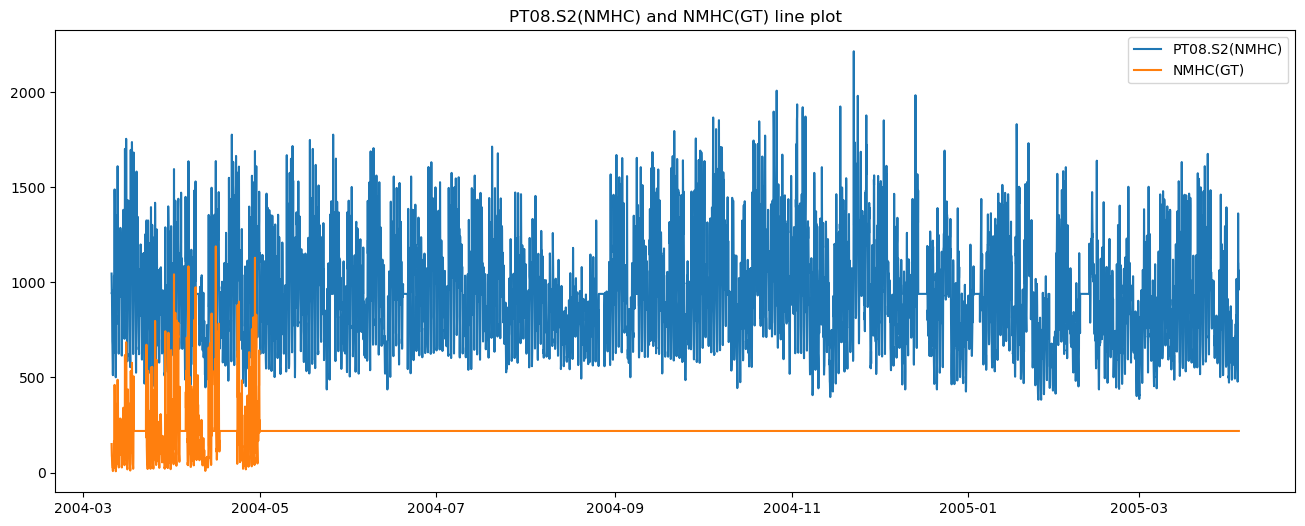

In [24]:
show_line_plot(all_mean_df, "PT08.S2(NMHC)", "NMHC(GT)")

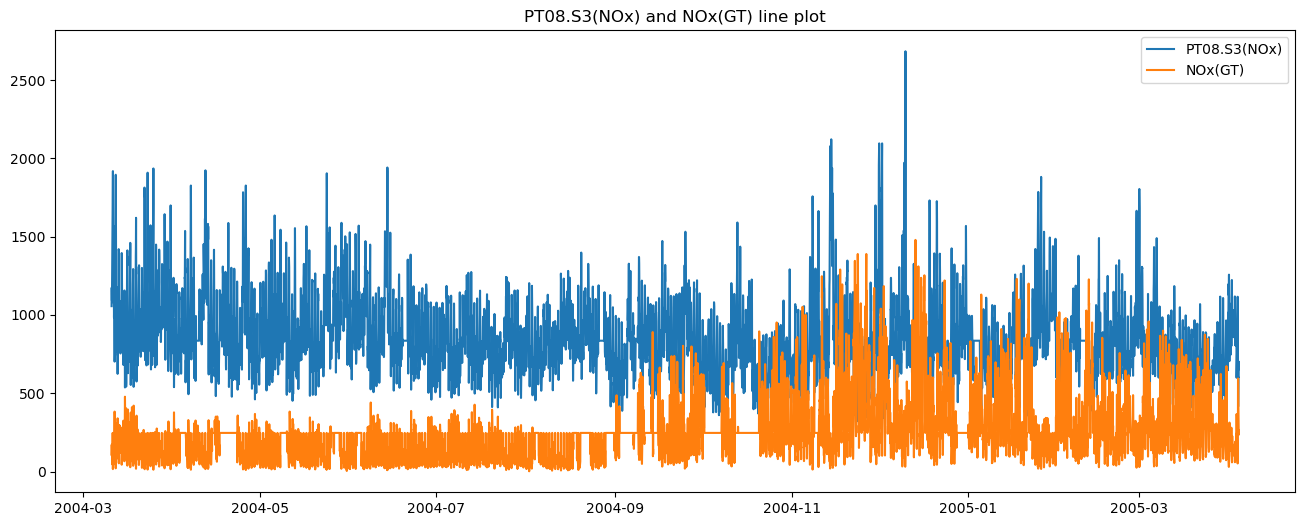

In [25]:
show_line_plot(all_mean_df, "PT08.S3(NOx)", "NOx(GT)")

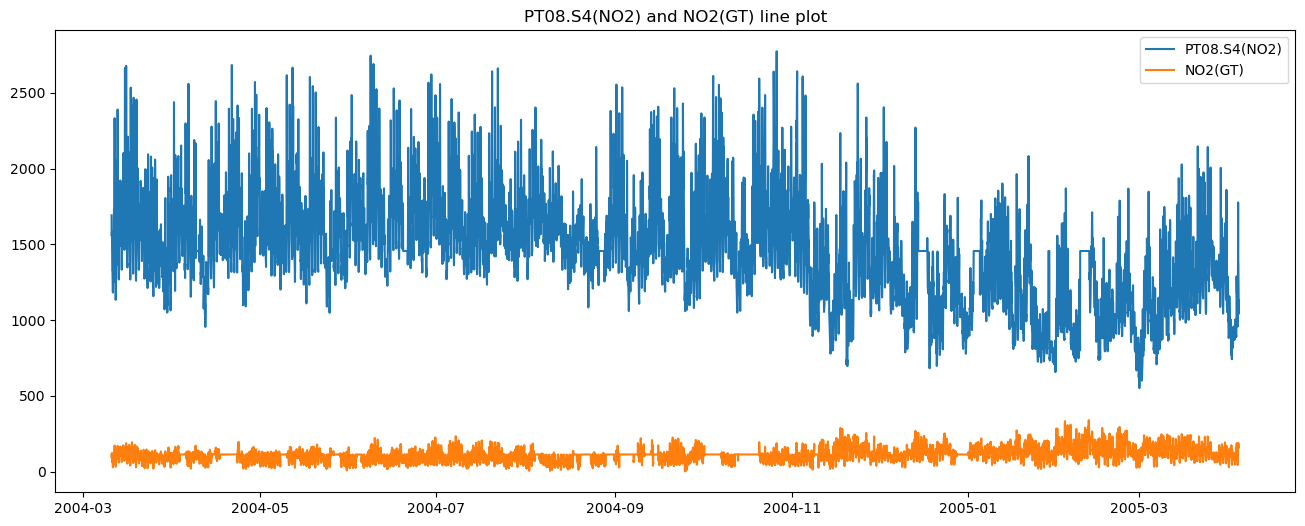

In [26]:
show_line_plot(all_mean_df, "PT08.S4(NO2)", "NO2(GT)")

after checking this graphs, it is obvious to predicted values are shifted. to get them with same frequence with gt values, they divided with power of 10th

In [27]:
all_mean_df["PT08.S1(CO)"] = all_mean_df["PT08.S1(CO)"] / 1000
all_mean_df["PT08.S2(NMHC)"] = all_mean_df["PT08.S2(NMHC)"] / 10
all_mean_df["PT08.S3(NOx)"] = all_mean_df["PT08.S3(NOx)"] / 10
all_mean_df["PT08.S4(NO2)"] = all_mean_df["PT08.S4(NO2)"] / 10
all_mean_df["PT08.S5(O3)"] = all_mean_df["PT08.S5(O3)"] / 10

In [28]:
all_mean_df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,2.6,1.360,150.0,11.9,104.6,166.0,105.6,113.0,169.2,126.8,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1.292,112.0,9.4,95.5,103.0,117.4,92.0,155.9,97.2,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1.402,88.0,9.0,93.9,131.0,114.0,114.0,155.5,107.4,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1.376,80.0,9.2,94.8,172.0,109.2,122.0,158.4,120.3,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1.272,51.0,6.5,83.6,131.0,120.5,116.0,149.0,111.0,11.2,59.6,0.7888,2004-03-10 22:00:00


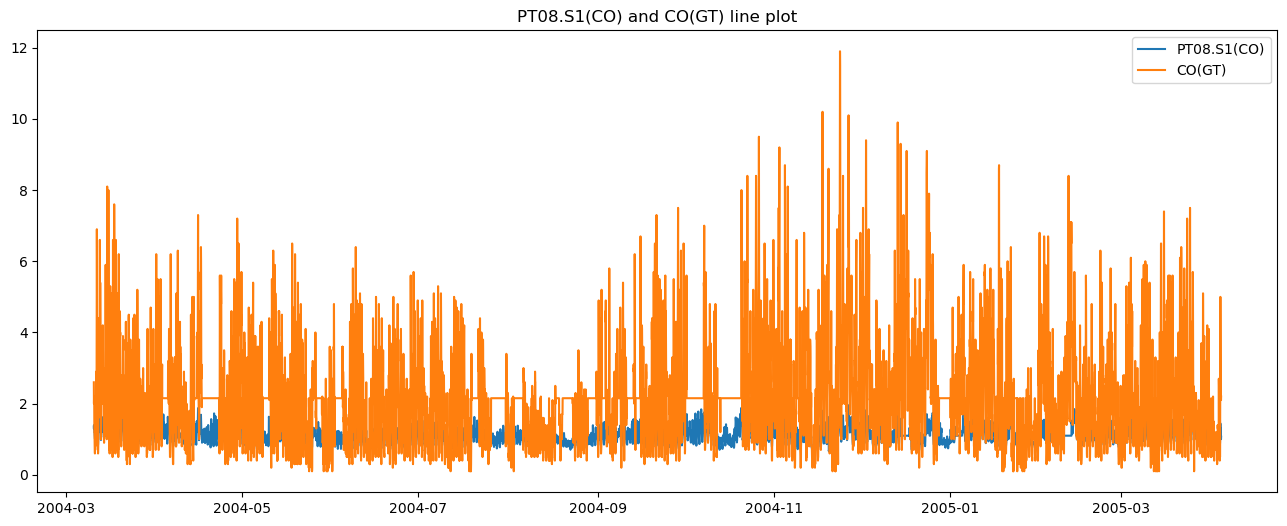

In [29]:
show_line_plot(all_mean_df, "PT08.S1(CO)", "CO(GT)")

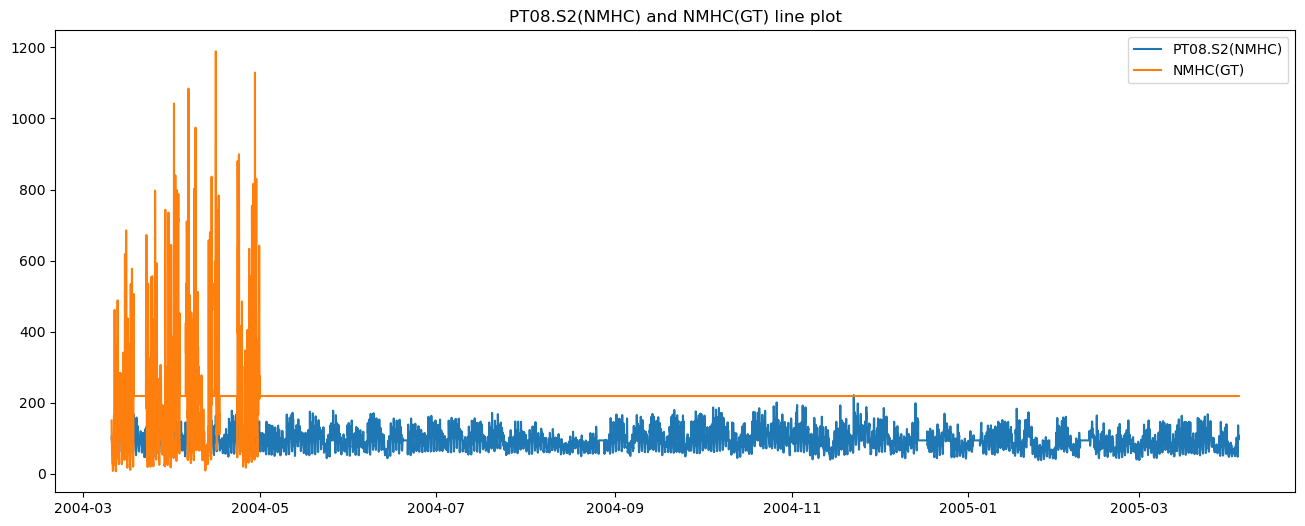

In [30]:
show_line_plot(all_mean_df, "PT08.S2(NMHC)", "NMHC(GT)")

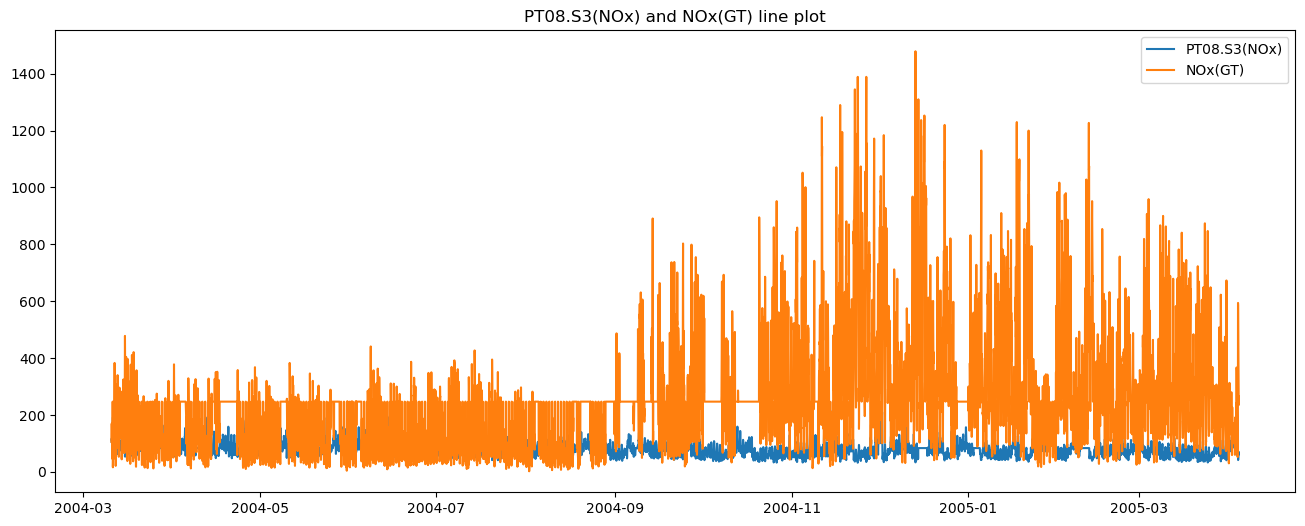

In [31]:
show_line_plot(all_mean_df, "PT08.S3(NOx)", "NOx(GT)")

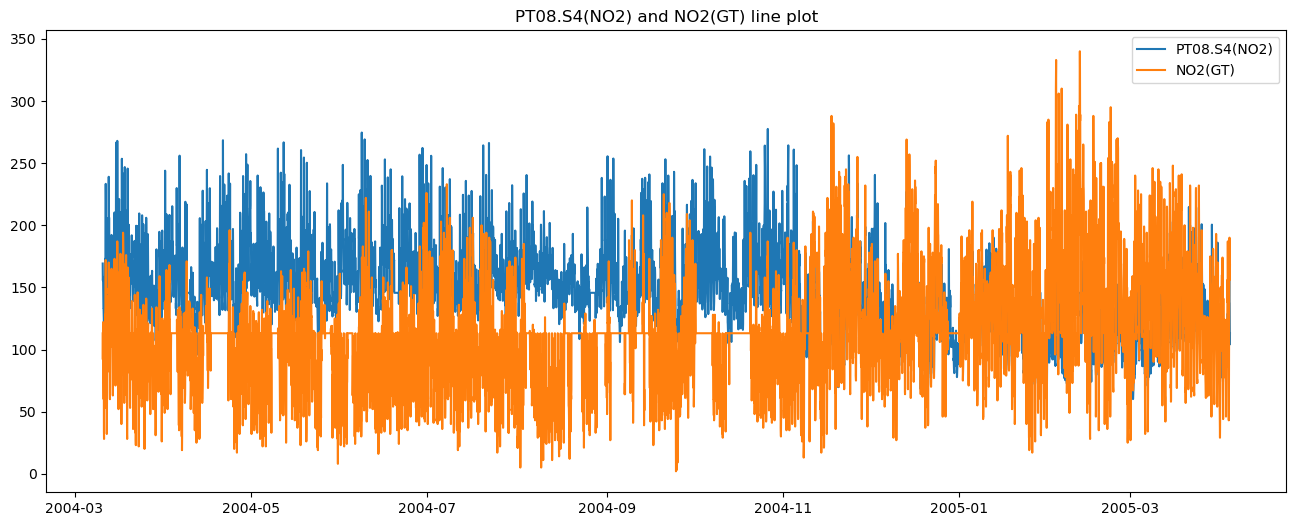

In [32]:
show_line_plot(all_mean_df, "PT08.S4(NO2)", "NO2(GT)")

Considering more than 0.6 positive or negative correlation might be useful to create new features after talking with an expert.

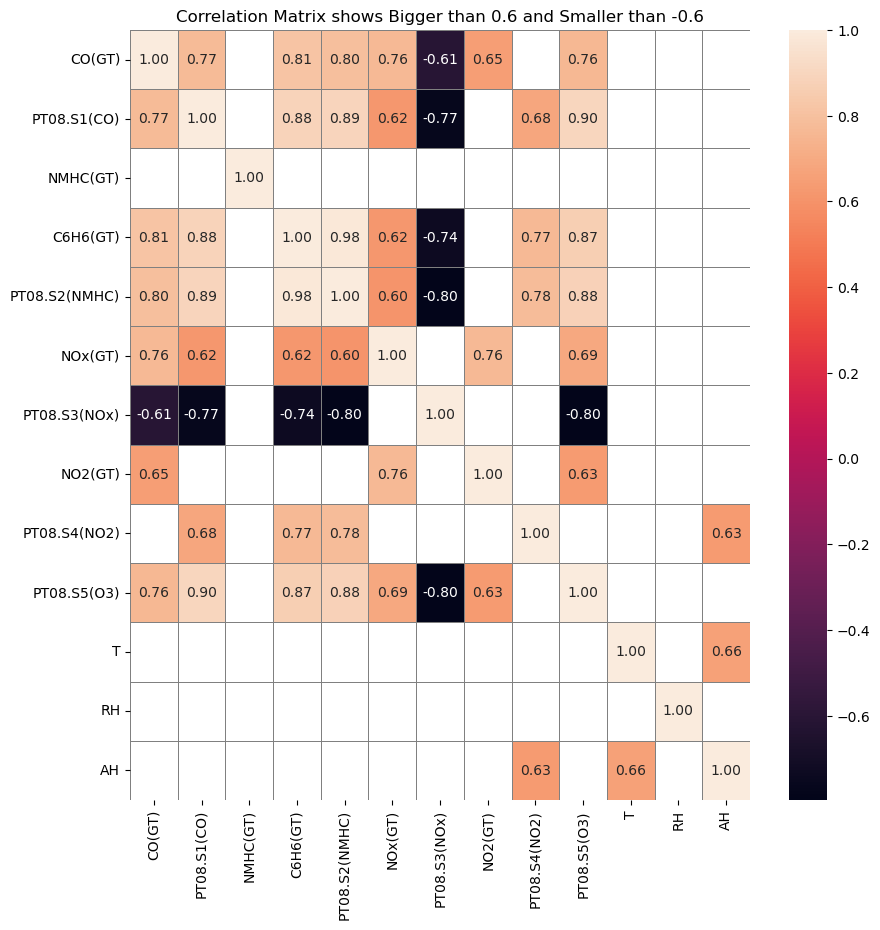

In [33]:
plt.figure(figsize=(10, 10))
corr_matrix = all_mean_df.drop(columns=["DateTime"]).corr()
high_correlation = corr_matrix[(corr_matrix > 0.6) | (corr_matrix < -0.6)]
sns.heatmap(high_correlation, annot=True, fmt=".2f", linewidths=0.5, linecolor="gray")
plt.title("Correlation Matrix shows Bigger than 0.6 and Smaller than -0.6")
plt.show()

Since all of them is continous numeric values, it's might be better to use min max scaler like algorithm to training machine learning model. other than that according to what we get this model it might be useful to apply data reduction like getting daily mean or median to training.

In [34]:
# make DateTime index and apply minmax scaler
all_mean_df = all_mean_df.set_index("DateTime")
scaler = MinMaxScaler()
all_mean_df = pd.DataFrame(
    scaler.fit_transform(all_mean_df),
    columns=all_mean_df.columns,
    index=all_mean_df.index,
)
all_mean_df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,
2004-03-10 18:00:00,0.211864,0.511845,0.120981,0.185535,0.362097,0.111036,0.310885,0.328402,0.513040,0.454822,0.333333,0.499371,0.280066
2004-03-10 19:00:00,0.161017,0.463029,0.088832,0.146226,0.312398,0.068382,0.360864,0.266272,0.453237,0.326238,0.326882,0.484277,0.264282
2004-03-10 20:00:00,0.177966,0.541996,0.068528,0.139937,0.303659,0.087339,0.346463,0.331361,0.451439,0.370547,0.296774,0.563522,0.276352
2004-03-10 21:00:00,0.177966,0.523331,0.061760,0.143082,0.308575,0.115098,0.326133,0.355030,0.464478,0.426586,0.277419,0.638994,0.294190
2004-03-10 22:00:00,0.127119,0.448672,0.037225,0.100629,0.247406,0.087339,0.373994,0.337278,0.422212,0.386186,0.281720,0.633962,0.295216


In [35]:
# save dataset to processed folder as parquet
all_mean_df.to_parquet(
    os.path.join(PROCESSED_DATASET_PATH, "all_mean_df.parquet"), index=False
)

Dataset ready to use for machine learning training.